In [1]:
import pandas as pd
df = pd.read_csv("C:/Users/likhi/OneDrive/Desktop/CSE 598-SLT/Project/BCWD.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [2]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [3]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [4]:
df= df.drop(['Unnamed: 32','id'],axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [6]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

C:\Users\likhi\AppData\Local\Temp\ipykernel_16868\3297876273.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


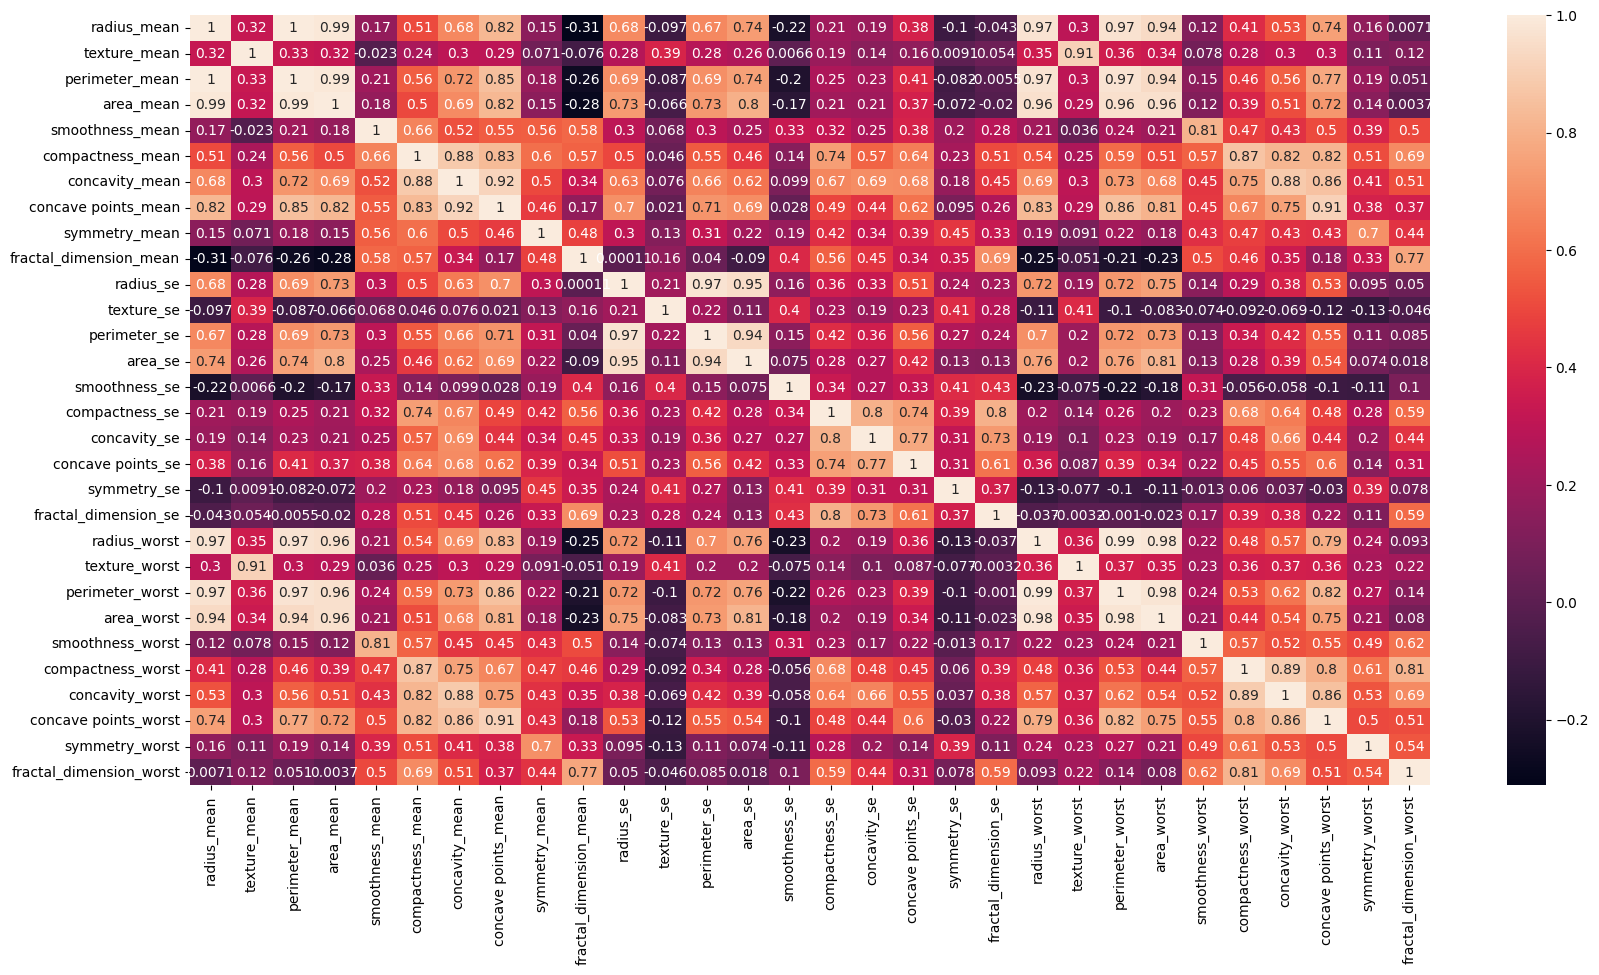

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.ioff()

In [8]:
from sklearn.preprocessing import LabelEncoder
LEncoder = LabelEncoder()

df['diagnosis'] = LEncoder.fit_transform(df['diagnosis'])

#So we have encoded malignant as 1 and benign as 0

In [9]:
X = df.drop('diagnosis',axis=1).values
y = df['diagnosis'].values

In [10]:
from sklearn.model_selection import train_test_split

random_state = 34
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=random_state)

In [11]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

X_train = sc.fit_transform(x_train)
X_test= sc.transform(x_test)

In [12]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, ClassifierMixin, RegressorMixin
from numpy import exp,dot
from scipy.spatial.distance import cdist

class LSSVMClassification(BaseEstimator, ClassifierMixin):
    """
    An Least Squared Support Vector Machine (LS-SVM) classification class, build
    on the BaseEstimator and ClassifierMixin base classes of sklearn.

    Attributes:
        - gamma : the hyper-parameter (float)
        - kernel: the kernel used     (string)
        - kernel_: the actual kernel function
        - x : the data on which the LSSVM is trained (call it support vectors)
        - y : the targets for the training data
        - coef_ : coefficents of the support vectors
        - intercept_ : intercept term

    """
    def __init__(self, gamma=1, kernel=None, c=1, d=2, sigma=1):
        self.gamma = gamma
        self.c = c
        self.d = d
        self.sigma = sigma
        self.kernel = None
        if kernel is None:
            self.kernel = 'rbf'
        else:
            self.kernel = kernel

        params = dict()
        if kernel == 'poly':
            params['c'] = c
            params['d'] = d
        elif kernel == 'rbf':
            params['sigma'] = sigma

        # Model parameters  
        self.x = None
        self.y = None
        self.y_labels = None

        self.coef_ = None        
        self.intercept_ = None          

        self.kernel = LSSVMClassification.get_kernel(self.kernel, **params)

    def get_params(self, deep=True):
        return {"c": self.c, "d": self.d, "gamma": self.gamma,
                "kernel": self.kernel, "sigma":self.sigma}

    def set_params(self, **parameters):
        #print("SETTING PARAMETERS IN LSSVM:",parameters.items())

        for parameter, value in parameters.items():
            #setattr should do the trick for gamma,c,d,sigma and kernel
            setattr(self, parameter, value)
        #now also update the actual kernel
        params = dict()
        if self.kernel == 'poly':
            params['c'] = self.c
            params['d'] = self.d
        elif self.kernel == 'rbf':
            params['sigma'] = self.sigma
        self.kernel_ = LSSVMClassification.get_kernel(self.kernel, **params)

        return self

    def set_attributes(self, **parameters):
        #not the most efficient way of doing it...but sufficient for the time being
        for param, value in parameters.items():
            if param == 'intercept_':
                self.intercept_ = value
            elif param == 'coef_':
                self.coef_ = value
            elif param == 'support_':
                self.x = value

    @staticmethod
    def get_kernel(name, **params):
        def linear(xi, xj):
            return np.dot(xi, xj.T)

        def poly(xi, xj, c=params.get('c', 1.0), d=params.get('d', 2)):
            return ((np.dot(xi, xj.T))/c  + 1)**d

        def rbf(xi, xj, sigma=params.get('sigma', 1.0)):
            if (xi.ndim == 2 and xi.ndim == xj.ndim): # both are 2D matrices
                return np.exp(-(cdist(xi, xj, metric='sqeuclidean'))/(2*(sigma**2)))
            elif ((xi.ndim < 2) and (xj.ndim < 3)):
                ax = len(xj.shape)-1 #compensate for python zero-base
                return np.exp(-(np.dot(xi, xi) + (xj**2).sum(axis=ax)
                                - 2*np.dot(xi, xj.T))/(2*(sigma**2)))
            else:
                message = "The rbf kernel is not suited for arrays with rank >2"
                raise Exception(message)

        def sigmoid(xi, xj, gamma=params.get('gamma', 1.0)):
            return np.tanh(gamma * np.dot(xi, xj.T))

        kernels = {'linear': linear, 'poly': poly, 'rbf': rbf, 'sigmoid': sigmoid}

        if kernels.get(name) is not None:
            return kernels[name]
        else: #unknown kernel: crash and burn?
            raise KeyError("Kernel '{}' is not defined, try one in the list: {}.".format(name, list(kernels.keys())))
    
    def __OptimizeParams(self, X, y_values):
        # Classification
        # Omega = np.multiply( np.multiply.outer(y,y), self.kernel_(X,X) ) # correct version
        #A_dag = np.linalg.pinv(np.block([
        #    [0,                           y.T                   ],
        #    [y,   Omega + self.gamma**-1 * np.eye(len(y_values))]
        #])) #need to check if the matrix is OK--> y.T parts
        #B = np.array([0]+[1]*len(y_values))
        
        omega = np.multiply(y_values * y_values.T, self.kernel(X, X))

        A_cross = np.linalg.pinv(np.block([
            [0, y_values.T],
            [y_values, omega + self.gamma ** -1 * np.eye(len(y_values))]
        ]))

        B = np.array([0] + [1] * len(y_values))

        solution = dot(A_cross, B)
        intercept_ = solution[0]
        coef_ = solution[1:]

        return (intercept_, coef_)

    def fit(self, X, Y, verboses=0):
        self.x = X
        self.y = Y
        self.y_labels = np.unique(Y, axis=0)

        if len(self.y_labels) == 2:  # binary classification
            # converting to -1/+1
            y_values = np.where(
                (Y == self.y_labels[0])
                , -1, +1)[:, np.newaxis]  # making it a column vector

            self.intercept_, self.coef_ = self.__OptimizeParams(X, y_values)

        else:  # multiclass classification
            # ONE-VS-ALL APPROACH
            n_classes = len(self.y_labels)
            self.intercept_ = np.zeros(n_classes)
            self.coef_ = np.zeros((n_classes, len(Y)))
            for i in range(n_classes):
                # converting to +1 for the desired class and -1 for all other classes
                y_values = np.where(
                    (Y == self.y_labels[i])
                    , +1, -1)[:, np.newaxis]  # making it a column vector

                self.intercept_[i], self.coef_[i] = self.__OptimizeParams(X, y_values)

    def predict(self, X):
        K = self.kernel(self.x, X)

        if len(self.y_labels) == 2:  # binary classification
            y_values = np.where(
                (self.y == self.y_labels[0]),
                -1, +1)[:, np.newaxis]  # making it a column vector

            Y = np.sign(dot(np.multiply(self.coef_, y_values.flatten()), K) + self.intercept_)

            y_pred_labels = np.where(Y == -1, self.y_labels[0],
                                     self.y_labels[1])

        else:  # multiclass classification, ONE-VS-ALL APPROACH
            Y = np.zeros((len(self.y_labels), len(X)))
            for i in range(len(self.y_labels)):
                y_values = np.where(
                    (self.y == self.y_labels[i]),
                    +1, -1)[:, np.newaxis]  # making it a column vector
                Y[i] = dot(np.multiply(self.coef_[i], y_values.flatten()), K) + self.intercept_[i]  # no sign function applied

            predictions = np.argmax(Y, axis=0)
            y_pred_labels = np.array([self.y_labels[i] for i in predictions])

        return y_pred_labels.ravel()
######################################################################################################################

In [13]:
import numpy as np
from sklearn.svm import SVC
param_kernel=['linear', 'rbf', 'poly', 'sigmoid']
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score, f1_score, log_loss, cohen_kappa_score, matthews_corrcoef, mean_squared_error, mean_absolute_error

for ker in param_kernel:
    print('\nFor the %s kernel \n'%(ker))
    svc = SVC(kernel=ker)
    svc.fit(X_train,y_train)

    Y_pred = svc.predict(X_test)
    #print(Y_pred)

    acc = accuracy_score(y_test, Y_pred)
    mis = 1-acc
    pre = precision_score(y_test, Y_pred)
    rec = recall_score(y_test, Y_pred)
    f1 = f1_score(y_test, Y_pred) 
    roc = roc_auc_score(y_test, Y_pred)
    loss = log_loss(y_test, Y_pred)
    kappa = cohen_kappa_score(y_test, Y_pred)
    mcc = matthews_corrcoef(y_test, Y_pred)
    mse = mean_squared_error(y_test, Y_pred)
    mae = mean_absolute_error(y_test, Y_pred)
    cm = np.array(confusion_matrix(y_test, Y_pred, labels=[1,0]))
    TP = cm[1,1] # true positive 
    TN = cm[0,0] # true negatives
    FP = cm[0,1] # false positives
    FN = cm[1,0] # false negatives

    sen = TP / (TP + FN)
    spe = TN / (TN + FP)

    confusion_mat= pd.DataFrame(cm, index = ['Benign', 'Malignant'],
                            columns =['predicted_Benign','predicted_Malignant'])

    print('Accuracy: {:.2f}'.format(acc))
    print('Misclassification Error: {:.2f}'.format(mis))
    print('Precision: {:.2f}'.format(pre))
    print('Recall: {:.2f}'.format(rec))
    print('F1 score: {:.2f}'.format(f1))
    print('Specificity:{:.2f}'.format(spe))
    print('Sensitivity:{:.2f}'.format(sen))
    print('AUC score: {:.2f}'.format(roc))
    print('Log loss: {:.2f}'.format(loss))
    print("Cohen's Kappa: {:.2f}".format(kappa))
    print("Matthew's correlation coefficient: {:.2f}".format(mcc))
    print('MAE: {:.2f}'.format(mae))
    print('MSE: {:.2f}'.format(mse))

    print('Confusion Matrix: \n',confusion_mat)



For the linear kernel 

Accuracy: 0.99
Misclassification Error: 0.01
Precision: 1.00
Recall: 0.98
F1 score: 0.99
Specificity:0.98
Sensitivity:1.00
AUC score: 0.99
Log loss: 0.21
Cohen's Kappa: 0.99
Matthew's correlation coefficient: 0.99
MAE: 0.01
MSE: 0.01
Confusion Matrix: 
            predicted_Benign  predicted_Malignant
Benign                   59                    1
Malignant                 0                  111

For the rbf kernel 

Accuracy: 0.99
Misclassification Error: 0.01
Precision: 0.98
Recall: 0.98
F1 score: 0.98
Specificity:0.98
Sensitivity:0.99
AUC score: 0.99
Log loss: 0.42
Cohen's Kappa: 0.97
Matthew's correlation coefficient: 0.97
MAE: 0.01
MSE: 0.01
Confusion Matrix: 
            predicted_Benign  predicted_Malignant
Benign                   59                    1
Malignant                 1                  110

For the poly kernel 

Accuracy: 0.99
Misclassification Error: 0.01
Precision: 0.98
Recall: 0.98
F1 score: 0.98
Specificity:0.98
Sensitivity:0.99
AUC s

In [14]:
for ker in param_kernel:
    print('\nFor the %s kernel \n'%(ker))
    lssvc = LSSVMClassification(kernel=ker)
    lssvc.fit(X_train,y_train)

    Y_pred = lssvc.predict(X_test)
    #print(Y_pred)

    acc = accuracy_score(y_test, Y_pred)
    mis = 1-acc
    pre = precision_score(y_test, Y_pred)
    rec = recall_score(y_test, Y_pred)
    f1 = f1_score(y_test, Y_pred) 
    roc = roc_auc_score(y_test, Y_pred)
    loss = log_loss(y_test, Y_pred)
    kappa = cohen_kappa_score(y_test, Y_pred)
    mcc = matthews_corrcoef(y_test, Y_pred)
    mse = mean_squared_error(y_test, Y_pred)
    mae = mean_absolute_error(y_test, Y_pred)
    cm = np.array(confusion_matrix(y_test, Y_pred, labels=[1,0]))
    TP = cm[1,1] # true positive 
    TN = cm[0,0] # true negatives
    FP = cm[0,1] # false positives
    FN = cm[1,0] # false negatives

    sen = TP / (TP + FN)
    spe = TN / (TN + FP)

    confusion_mat= pd.DataFrame(cm, index = ['Benign', 'Malignant'],
                            columns =['predicted_Benign','predicted_Malignant'])

    print('Accuracy: {:.2f}'.format(acc))
    print('Misclassification Error: {:.2f}'.format(mis))
    print('Precision: {:.2f}'.format(pre))
    print('Recall: {:.2f}'.format(rec))
    print('F1 score: {:.2f}'.format(f1))
    print('Specificity:{:.2f}'.format(spe))
    print('Sensitivity:{:.2f}'.format(sen))
    print('AUC score: {:.2f}'.format(roc))
    print('Log loss: {:.2f}'.format(loss))
    print("Cohen's Kappa: {:.2f}".format(kappa))
    print("Matthew's correlation coefficient: {:.2f}".format(mcc))
    print('MAE: {:.2f}'.format(mae))
    print('MSE: {:.2f}'.format(mse))

    print('Confusion Matrix: \n',confusion_mat)



For the linear kernel 

Accuracy: 0.97
Misclassification Error: 0.03
Precision: 1.00
Recall: 0.92
F1 score: 0.96
Specificity:0.92
Sensitivity:1.00
AUC score: 0.96
Log loss: 1.05
Cohen's Kappa: 0.93
Matthew's correlation coefficient: 0.94
MAE: 0.03
MSE: 0.03
Confusion Matrix: 
            predicted_Benign  predicted_Malignant
Benign                   55                    5
Malignant                 0                  111

For the rbf kernel 

Accuracy: 0.99
Misclassification Error: 0.01
Precision: 1.00
Recall: 0.97
F1 score: 0.98
Specificity:0.97
Sensitivity:1.00
AUC score: 0.98
Log loss: 0.42
Cohen's Kappa: 0.97
Matthew's correlation coefficient: 0.97
MAE: 0.01
MSE: 0.01
Confusion Matrix: 
            predicted_Benign  predicted_Malignant
Benign                   58                    2
Malignant                 0                  111

For the poly kernel 

Accuracy: 0.98
Misclassification Error: 0.02
Precision: 0.98
Recall: 0.95
F1 score: 0.97
Specificity:0.95
Sensitivity:0.99
AUC s